In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.fft import fft, fftfreq
from pytest import approx

In [2]:
experiment = "MOS2_150uW_9K"
# experiment = "GaAs_50uW_rt"

In [3]:
def plot_my_freq_array(freqs, complex_array, half=False):
    N = len(freqs)
    if half:
        last = N//2
    else:
        last = N
    plt.plot(freqs[0:last], np.real(complex_array)[0:last], 'xr', label='real')
    plt.plot(freqs[0:last], -1.0 * np.imag(complex_array)[0:last], 'xb', label='imag')
    plt.plot(freqs[0:last], np.abs(complex_array)[0:last], 'xg', label='abs')
    plt.legend()
    plt.grid()
    plt.show()

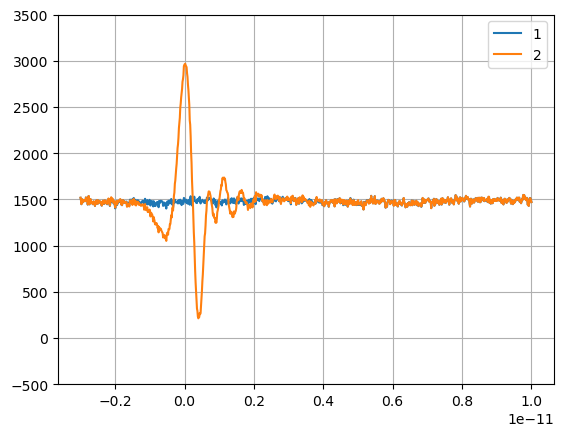

In [4]:
ref = np.loadtxt(fname='data/'+experiment+'_TDS.txt', delimiter=' ')

plt.ylim((-500, 3500))
for col in range(1, ref.shape[1]):
    plt.plot(ref[:, 0], ref[:, col], label=str(col))
plt.legend()
plt.grid()

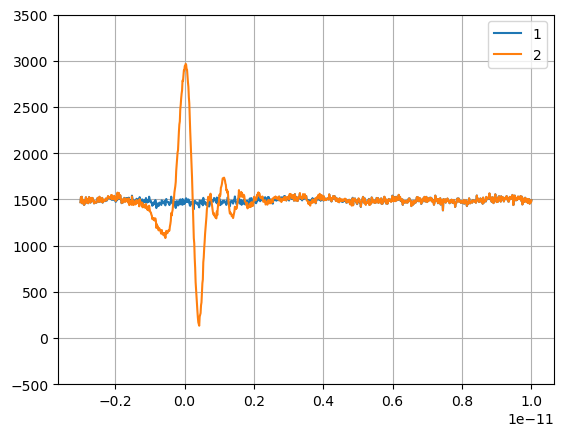

In [5]:
sample = np.loadtxt(fname='data/'+experiment+'_TRTS.txt', delimiter=' ')

plt.ylim((-500, 3500))
for col in range(1, sample.shape[1]):
    plt.plot(sample[:, 0], sample[:, col], label=str(col))
plt.legend()
plt.grid()

In [6]:
# Do some tests to make sure what we are dealing with

# Sample and reference should have the same time steps
assert sample[:, 0].all() == approx(ref[:, 0].all())  # we're dealing with reals

# The time steps must be evenly distributed
T = sample[1, 0] - sample[0, 0]
for i in range(1, len(sample)):
    assert T == approx(sample[i, 0] - sample[i-1, 0])

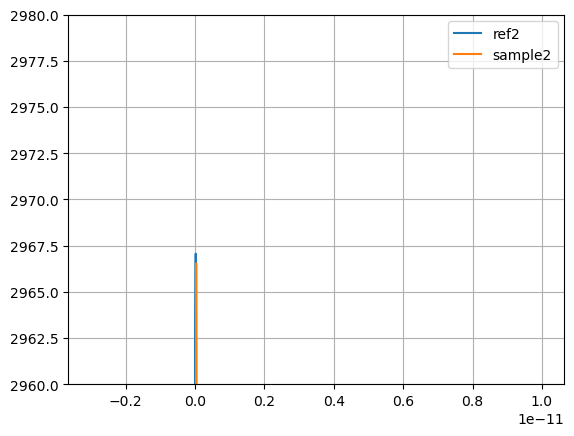

In [7]:
plt.ylim((2960, 2980))
plt.plot(ref[:, 0], ref[:, 2], label='ref'+str(2))
plt.plot(sample[:, 0], sample[:, 2], label='sample'+str(2))
plt.legend()
plt.grid()

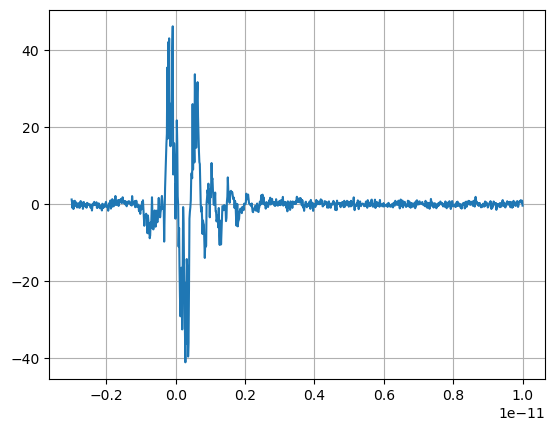

In [8]:
# plt.ylim((2960, 2980))
# plt.xlim((-2e-12, 2e-12))
plt.plot(ref[:, 0], ref[:, 2] - ref[:, 1] - (sample[:, 2] - sample[:, 1]))
#plt.legend()
plt.grid()

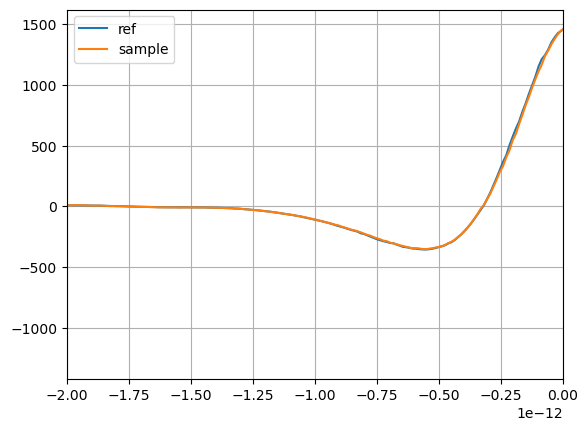

In [9]:
# plt.ylim((250, 1000))
plt.xlim((-2e-12, 0))
plt.plot(ref[:, 0], ref[:, 2] - ref[:, 1], label="ref")
plt.plot(ref[:, 0], sample[:, 2] - sample[:, 1], label="sample")
plt.legend()
plt.grid()

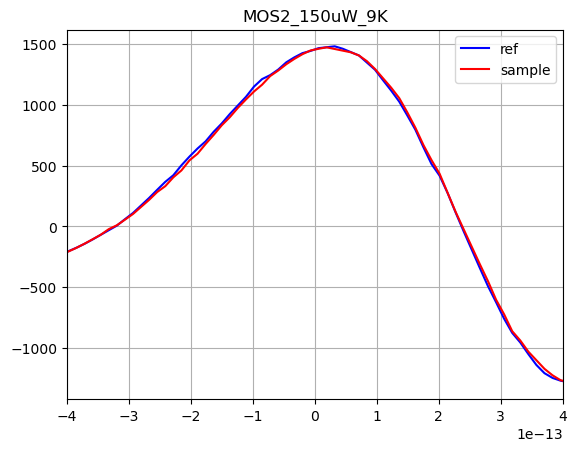

In [10]:
# plt.ylim((1350, 1500))
plt.xlim((-0.4e-12, 0.4e-12))
plt.plot(ref[:, 0], ref[:, 2] - ref[:, 1], 'b', label="ref")
plt.plot(ref[:, 0], sample[:, 2] - sample[:, 1], 'r', label="sample")
plt.legend()
plt.grid()
plt.title(experiment)

plt.savefig(experiment+'.png')

In [11]:
s2ms1_ref = ref[:, 2] - ref[:, 1]
s2ms1_sample = sample[:, 2] - sample[:, 1]

In [12]:
# Find the frequencies
T = ref[1, 0] - ref[0, 0]
N = len(ref[:, 0])
xf = fftfreq(N, T)

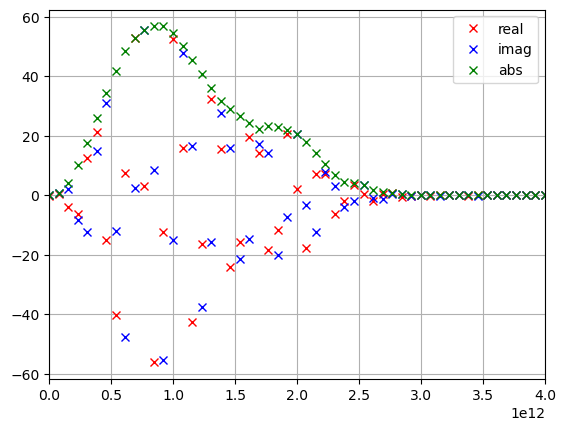

In [13]:
# Find the FT for ref
E_ref = (1.0/N) * fft(s2ms1_ref)
plt.xlim(0., 4e12)
plot_my_freq_array(xf, E_ref, half=True)

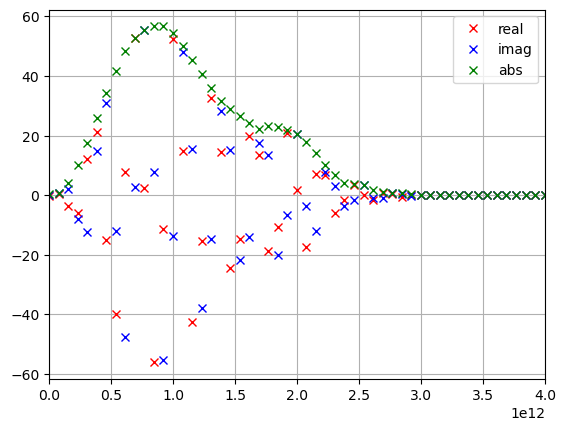

In [14]:
# Find the FT for sample
E_sample = (1.0/N) * fft(s2ms1_sample)
plt.xlim(0., 4e12)
plot_my_freq_array(xf, E_sample, half=True)

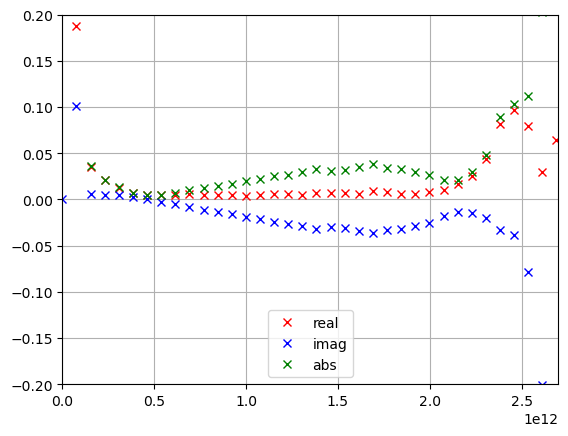

In [15]:
comp_array = (E_ref - E_sample)/E_sample

plt.xlim((0, 2.7e12))
plt.ylim((-0.2, .2))
plot_my_freq_array(xf, comp_array, half=True)

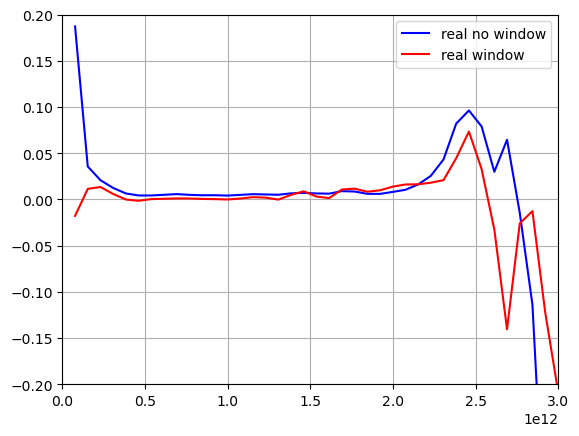

In [16]:
from scipy.signal import blackman
w = blackman(N)
E_ref_w = (1.0/N) * fft(s2ms1_ref*w)
E_sample_w = (1.0/N) * fft(s2ms1_sample*w)

comp_array_w = (E_ref_w - E_sample_w)/E_sample_w

plt.xlim((0, 3.e12))
plt.ylim((-0.2, .2))
plt.plot(xf[1:N//2], np.real(comp_array[1:N//2]), '-b', label='real no window')
plt.plot(xf[1:N//2], np.real(comp_array_w[1:N//2]), '-r', label='real window')
plt.legend()
plt.grid()
plt.show()

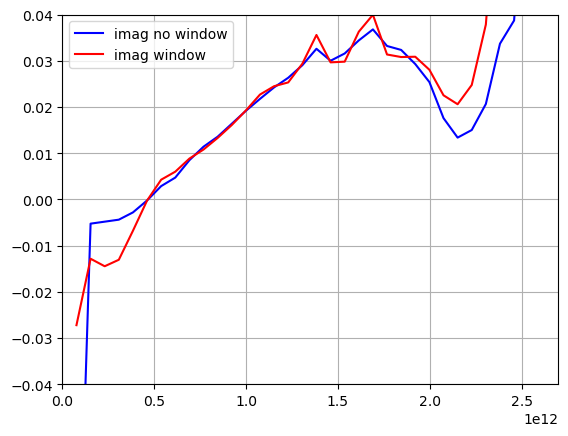

In [17]:
plt.xlim((0, 2.7e12))
plt.ylim((-0.04, .04))
plt.plot(xf[1:N//2], np.imag(comp_array[1:N//2]), '-b', label='imag no window')
plt.plot(xf[1:N//2], np.imag(comp_array_w[1:N//2]), '-r', label='imag window')
plt.legend()
plt.grid()
plt.show()